In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd

'C:\\Users\\USER\\Documents\\Received\\PYTHON\\Xin Yin\\WriteUp-Result 3-Research'

In [3]:
df=pd.read_csv("C:\\Users\\USER\\Documents\\Yin_DatabaseFor_Rocks.csv")

In [4]:
df

,SRn,Vp,Is,UCS
0,69.0,5390,11.02,158.16
1,64.0,5440,8.08,125.28
2,68.0,5740,8.44,129.04
3,67.0,6310,9.20,142.40
4,65.0,4740,7.25,109.17
...,...,...,...,...
724,23.0,2633,2.28,17.26
725,24.0,2886,2.36,19.90
726,32.0,3045,2.64,32.44
727,35.0,3099,2.77,36.95


In [5]:
#Check the shape of the data at this point
df.shape

(729, 4)

In [6]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SRn     729 non-null    float64
 1   Vp      729 non-null    int64  
 2   Is      729 non-null    float64
 3   UCS     729 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [7]:
#statistics about the data
df.describe()

,SRn,Vp,Is,UCS
count,729.000000,729.000000,729.000000,729.000000
mean,41.645432,4679.635117,4.338053,75.305366
std,11.877275,1387.795732,3.024891,44.779250
min,10.000000,375.000000,0.530000,2.030000
25%,33.000000,3722.000000,2.450000,42.790000
50%,41.000000,4922.000000,3.390000,63.680000
75%,50.000000,5685.000000,5.230000,102.500000
max,72.000000,7943.000000,23.100000,239.000000


In [8]:
#check for null values
df.isnull().sum()

SRn    0
Vp     0
Is     0
UCS    0
dtype: int64

In [9]:
#check the presence of duplicate values
df.duplicated().sum()

0

In [10]:
#what is the current shape of the dataset
df.shape


(729, 4)

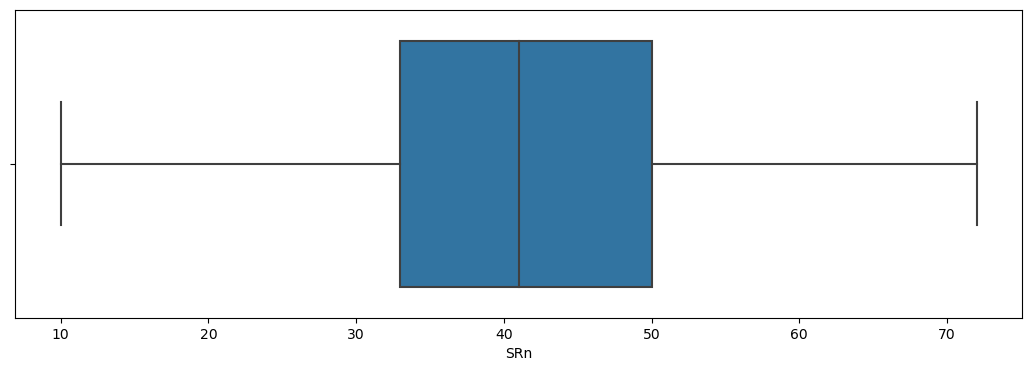

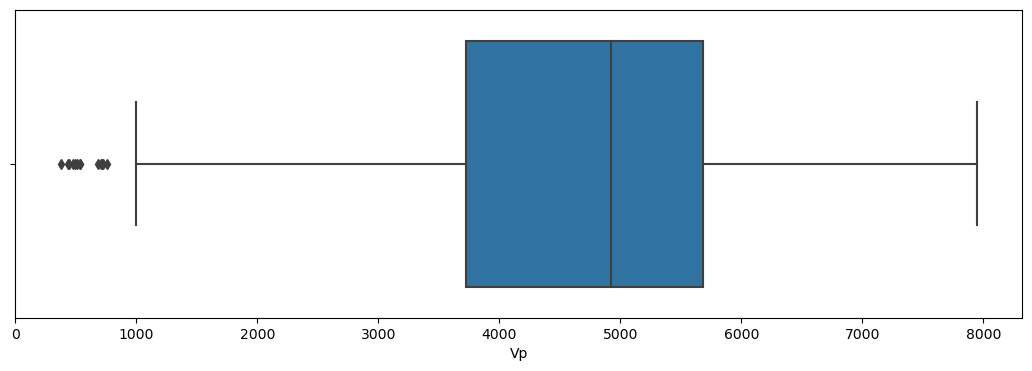

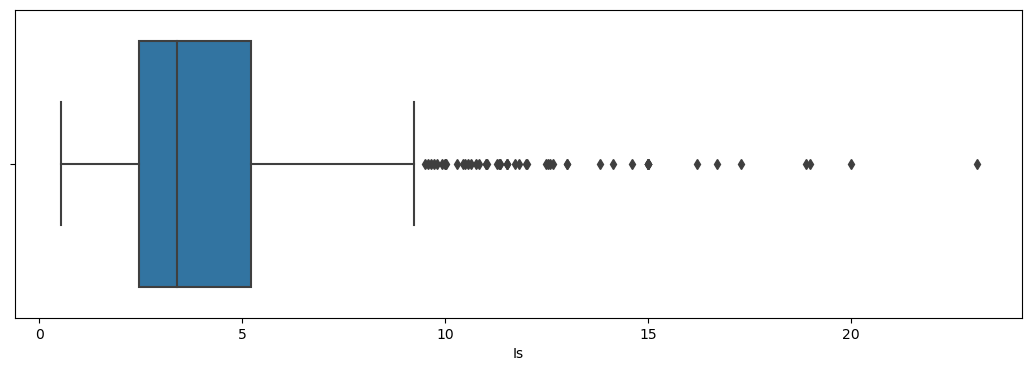

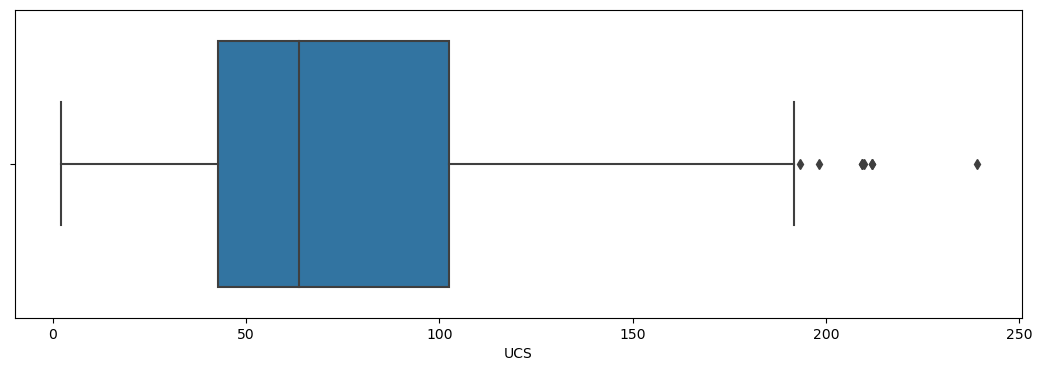

In [11]:
#EDA commences here
for column in df.columns:
    plt.figure(figsize=(13,4))
    sns.boxplot(x=column,data=df);

In [12]:
#what is the existing correlation among the independent variables
df.corr()

,SRn,Vp,Is,UCS
SRn,1.000000,0.430908,0.511204,0.685848
Vp,0.430908,1.000000,0.223489,0.637990
Is,0.511204,0.223489,1.000000,0.415398
UCS,0.685848,0.637990,0.415398,1.000000


<Axes: >

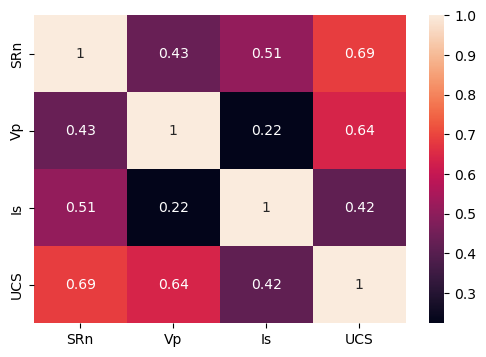

In [13]:
#produce a heatmap of the above result
plt.figure(figsize=(6,4))
sns.heatmap(data=df.corr(),annot=True)

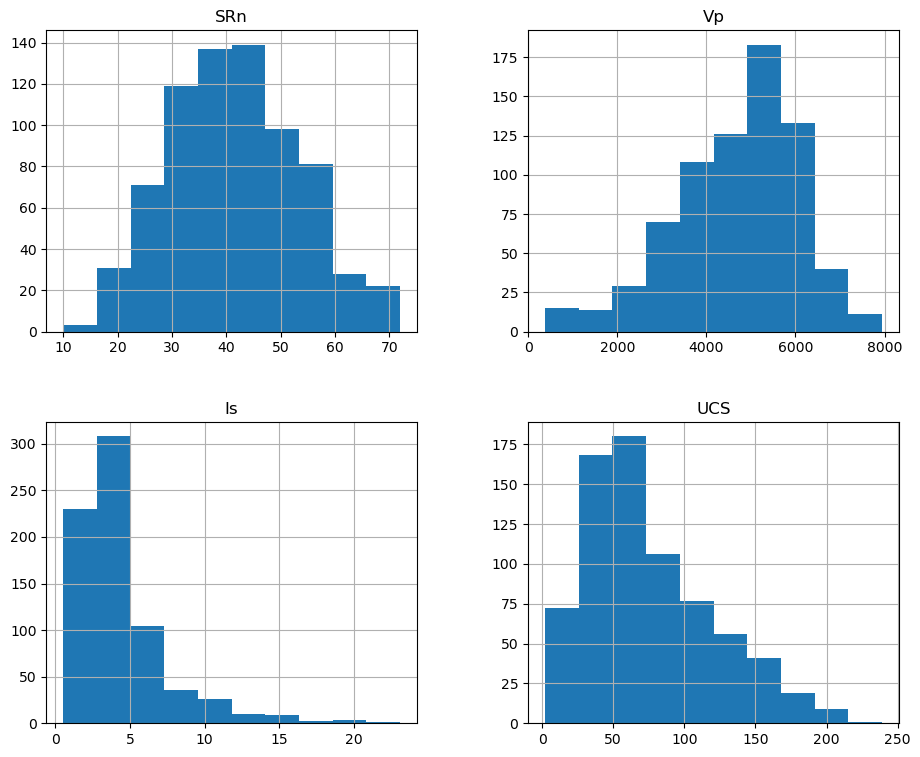

In [14]:
#conduct a univariate analysis

#make a histogram
df.hist(figsize=(11, 9));

In [15]:
#attempt to make data normally distributed, split data first in train-val-test

X=df.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y=df['UCS']

In [16]:

Trainingset_XinYin=pd.read_csv("C:\\Users\\USER\\Documents\\Book10-GB-RF-Train-90-10.csv")
Testset_XinYin=pd.read_csv("C:\\Users\\USER\\Documents\\Book10-GB-RF-Test-90-10.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\Documents\\Book10-GB-RF-Train-90-10.csv'

In [ ]:
Trainingset_XinYin

In [ ]:

X_model_train=Trainingset_XinYin.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y_model_train=Trainingset_XinYin['UCS']
X_test=Testset_XinYin.drop(['UCS'],axis=1) #X is "remove the variable in '' "
y_test=Testset_XinYin['UCS']

In [ ]:
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))




In [ ]:
X_model_train.skew()

In [ ]:
X_test.skew()

In [ ]:
#ChuksData_df = pd.DataFrame({'X_model_train': [X_model_train], 'y_model_train' : [y_model_train], 'X_test' : [X_test], 'y_test' : [y_test]})
#pd.DataFrame(X_model_train, y_model_train).to_csv('training.csv')
training_data_x = X_model_train
test_data_x = X_test
training_data_y = y_model_train
test_data_y = y_test
training_data_x.to_csv('yin_training_data_x.csv', index=False)
test_data_x.to_csv('yin_test_data_x.csv', index=False)
training_data_y.to_csv('yin_training_data_y.csv', index=False)
test_data_y.to_csv('yin_test_data_y.csv', index=False)

In [ ]:
X_model_train.hist(figsize=(15,7));

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X_model_train_transformed_arr=pt.fit_transform(X_model_train)
X_test_transformed_arr=pt.fit_transform(X_test)

In [ ]:
X_model_train_transformed=pd.DataFrame(X_model_train_transformed_arr,columns=X_model_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed_arr, columns=['SRn', 'Vp', 'Is'])
from scipy import stats

In [ ]:
#visualising their respective QQPlots
for col in X.columns:
    plt.figure(figsize=(16,5))
    plt.subplot(2,2,1)
    stats.probplot(x=X_model_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.subplot(2,2,2)
    stats.probplot(x=X_model_train_transformed[col],dist='norm',plot=plt)
    plt.title(label=col+' After Transformation')
    plt.subplot(2,2,3)
    sns.kdeplot(x=X[col])
    plt.subplot(2,2,4)
    sns.kdeplot(x=X_model_train_transformed[col])
    plt.show()

In [ ]:
X_model_train_transformed.skew()

In [ ]:
X_model_train_transformed

In [ ]:
#Similarly for test data
X_test.skew()

In [ ]:
X_test_transformed

In [ ]:

X_model_train_transformed.to_csv('Yin_X_model_train_transformed.csv', index=False) 

In [ ]:
X_test_transformed.to_csv('Yin_X_test_transformed.csv', index=False) 

In [ ]:
pwd

In [ ]:
#Model Building


In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score #for grid search
from bayes_opt import BayesianOptimization #for Bayesian Optimization
import pyswarms as ps #For Particle Swarm Algorithm (PSO)
from pyswarms.utils.search.grid_search import GridSearch
from scipy.optimize import differential_evolution #for Genetic Algorithms and Differential Evolution
from sklearn.metrics import accuracy_score
import cma #CMA-ES
#numpy for BOA, GWO, WOA, SSA, AOA, AOA, IEOA, ABCA, ICA, SFS, 

In [ ]:
ABR = AdaBoostRegressor(random_state=42)
GBDT = GradientBoostingRegressor(random_state=42)
XGB = XGBRegressor(objective='reg:squarederror', random_state=42)
LGBM = LGBMRegressor(random_state=42)
RF = RandomForestRegressor(random_state=42)
ET = ExtraTreesRegressor(random_state=42)
ID3 = DecisionTreeRegressor(criterion='friedman_mse', random_state=42) #Iterative Dichotomiser 3 #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
C4_5 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_features=None, random_state=42) #a variation of standard decision tree algorithm, To specify the algorithm to be used, we can use the "criterion" parameter
CART = DecisionTreeRegressor(criterion='absolute_error', random_state=42) #Classification and Regression Trees

# Train models

models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}



In [ ]:
resultsTT = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

    # Make predictions on the training set
    y_pred_train = model.predict(X_model_train)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_model_train, y_pred_train))
    mae = mean_absolute_error(y_model_train, y_pred_train)
    vaf = 1 - (np.var(y_model_train - y_pred_train) / np.var(y_model_train))
    ns = 1 - mean_squared_error(y_model_train, y_pred_train) / np.var(y_model_train)
    wmape = np.mean(np.abs(y_model_train - y_pred_train) / np.abs(y_model_train))
    wmbe = np.mean(y_model_train - y_pred_train)
    r = np.corrcoef(y_model_train, y_pred_train)[0][1]
    r2 = r2_score(y_model_train, y_pred_train)
    resultsTT.append([name, rmse, mae, vaf, ns, wmape, wmbe, r, r2])
    
    # Print the performance metrics
    print(f"{name} - Training Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

    
# print the results
headersTT = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsTT, columns=headersTT))

In [ ]:
# print the predicted_results
train_predicts = pd.DataFrame(resultsTT, columns=headersTT)
train_predicts.to_csv('Yin_performances_prdicting_trainingYs.csv', index=False)


In [ ]:
pwd

In [ ]:
def get_predictions(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds
# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}

# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds, test_preds = get_predictions(model, X_model_train, y_model_train, X_test, y_test)
    predictions[name] = test_preds
    
# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_alls_df = pd.DataFrame(predictions)
test_preds_alls_df.to_csv('Yin_test_predsYs_alls.csv', index=False)



In [ ]:
predicted_train_y = pd.DataFrame(y_pred_train)
predicted_train_y.to_csv('Yin_predicted_train_y.csv', index=False)  #this generates just one prediction, all models are supposed to give predictions           

In [ ]:

# Define a function to get the predictions for each set
def get_predictions1(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions1 = {}


# Loop through the models and get the predictions for each set

for name, model in models.items():
    train_preds, test_preds = get_predictions1(model, X_model_train, y_model_train, X_test, y_test)
    predictions1[name] = train_preds   

# Convert the dictionary to a DataFrame and save to a CSV file
train_predicts_alls_df = pd.DataFrame(predictions1)
train_predicts_alls_df.to_csv('Yin_training_predictYs_as.csv', index=False)

In [ ]:
#Using standardized train values
resultsSTT = []
for name, model in models.items():
    model.fit(X_model_train_transformed, y_model_train)

    # Make predictions on the training set
    y_pred_train_trans = model.predict(X_model_train_transformed)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_model_train, y_pred_train_trans))
    mae = mean_absolute_error(y_model_train, y_pred_train_trans)
    vaf = 1 - (np.var(y_model_train - y_pred_train_trans) / np.var(y_model_train))
    ns = 1 - mean_squared_error(y_model_train, y_pred_train_trans) / np.var(y_model_train)
    wmape = np.mean(np.abs(y_model_train - y_pred_train_trans) / np.abs(y_model_train))
    wmbe = np.mean(y_model_train - y_pred_train_trans)
    r = np.corrcoef(y_model_train, y_pred_train_trans)[0][1]
    r2 = r2_score(y_model_train, y_pred_train_trans)
    resultsSTT.append([name, rmse, mae, vaf, ns, wmape, wmbe, r, r2])
    
    # Print the performance metrics
    print(f"{name} - Training Set Performance On Training set Transformed Data:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

# print the results
headersSTT = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsSTT, columns=headersSTT))

In [ ]:
# print the predicted_results_for the transformed training data
train_trans_predicts = pd.DataFrame(resultsSTT, columns=headersSTT)
train_trans_predicts.to_csv('Yin_training_trans_predicts.csv', index=False)
predicted_train_y_trans = pd.DataFrame(y_pred_train_trans)
predicted_train_y_trans.to_csv('Yin_predicted_train_y_trans.csv', index=False) 

In [ ]:
pwd

In [ ]:

# evaluate the models on testing set
resultsTS = []
for name, model in models.items():
    model.fit(X_model_train, y_model_train)
    y_pred_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    vaf = 1 - np.var(y_test-y_pred_test)/np.var(y_test)
    ns = 1 - np.sum((y_test-y_pred_test)**2)/np.sum((y_test-np.mean(y_pred_test))**2)
    wmape = np.mean(np.abs((y_test - y_pred_test) / np.abs(y_test)))
    wbme = np.mean(y_test - y_pred_test)
    r = np.corrcoef(y_test, y_pred_test)[0,1]
    r2 = r2_score(y_test, y_pred_test)
    resultsTS.append([name, rmse, mae, vaf, ns, wmape, wbme, r, r2])
    
     # Print the performance metrics
    print(f"{name} - Testing Set Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

# print the results
headersTS = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsTS, columns=headersTS))

In [ ]:
testing_predicts = pd.DataFrame(resultsTS, columns=headersTS)
testing_predicts.to_csv('Yin_testing_predictions_metrics.csv', index=False)
predicted_test_y = pd.DataFrame(y_pred_test)
predicted_test_y.to_csv('Yin_predicted_test_values_all.csv', index=False)

In [ ]:
pwd

In [ ]:
#Using standardized values of transformed testing set
resultsTTS = []
for name, model in models.items():
    model.fit(X_model_train_transformed, y_model_train)

    # Make predictions on the transformed testing set
    y_pred_test_trans = model.predict(X_test_transformed)
   


    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_trans))
    mae = mean_absolute_error(y_test, y_pred_test_trans)
    vaf = 1 - (np.var(y_test - y_pred_test_trans) / np.var(y_test))
    ns = 1 - mean_squared_error(y_test, y_pred_test_trans) / np.var(y_test)
    wmape = np.mean(np.abs(y_test - y_pred_test_trans) / np.abs(y_test))
    wmbe = np.mean(y_test - y_pred_test_trans)
    r = np.corrcoef(y_test, y_pred_test_trans)[0][1]
    r2 = r2_score(y_test, y_pred_test_trans)
    resultsTTS.append([name, rmse, mae, vaf, ns, wmape, wmbe, r, r2])
    
    # Print the performance metrics
    print(f"{name} - Testing Set Performance On Transformed Data:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"VAF: {vaf:.3f}")
    print(f"NS: {ns:.3f}")
    print(f"WMAPE: {wmape:.3f}")
    print(f"WMBE: {wmbe:.3f}")
    print(f"R: {r:.3f}")
    print(f"R^2: {r2:.3f}\n")

# print the results
headersTTS = ['Model', 'RMSE', 'MAE', 'VAF', 'NS', 'WMAPE', 'WMBE', 'R', 'R2']
print(pd.DataFrame(resultsTTS, columns=headersTTS))

In [ ]:
# print the predicted_results_for the transformed testing data
test_trans_predicts = pd.DataFrame(resultsTTS, columns=headersTTS)
test_trans_predicts.to_csv('Yin_testing_trans_predicts_metrics.csv', index=False)
predicted_test_y_trans = pd.DataFrame(y_pred_test_trans)
predicted_test_y_trans.to_csv('Yin_predicted_test_y_trans_metrics.csv', index=False)

In [ ]:
pwd

In [ ]:
# Define a function (for the transfored training set) to get the predictions for each set
def get_predictions(model, X_model_train_transformed, y_model_train, X_test_transformed, y_test):
    train_preds_trans = model.predict(X_model_train_transformed)
    test_preds_trans = model.predict(X_test_transformed)
    return train_preds_trans, test_preds_trans

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}


# Loop through the models and get the predictions for each set

for name, model in models.items():
    train_preds_trans, test_preds_trans = get_predictions(model, X_model_train_transformed, y_model_train, X_test_transformed, y_test)
    predictions[name] = train_preds_trans

# Convert the dictionary to a DataFrame and save to a CSV file
train_preds_trans_df = pd.DataFrame(predictions)
train_preds_trans_df.to_csv('Yin_training_preds_transAllsYs.csv', index=False)


In [ ]:
# Define a function to get the predictions for each set
def get_predictions(model, X_model_train, y_model_train, X_test, y_test):
    train_preds = model.predict(X_model_train)
    test_preds = model.predict(X_test)
    return train_preds, test_preds

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}


# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds, test_preds = get_predictions(model, X_model_train, y_model_train, X_test, y_test)
    predictions[name] = test_preds
   
# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_alls_df = pd.DataFrame(predictions)
test_preds_alls_df.to_csv('Yin_testing_preds_alls.csv', index=False)

In [ ]:
pwd

In [ ]:
# Define a function (for the transfored testing set) to get the predictions for each set
def get_predictions(model, X_model_train_transformed, y_model_train, X_test_transformed, y_test):
    train_preds_trans = model.predict(X_model_train_transformed)
    test_preds_trans = model.predict(X_test_transformed)
    return train_preds_trans, test_preds_trans

# Create a list of models
models = {'ABR': ABR, 'GBDT': GBDT, 'XGB': XGB, 'LGBM': LGBM, 'RF': RF, 'ET': ET, 'ID3': ID3, 'C4_5': C4_5, 'CART': CART}

# Create a dictionary to store the predictions for each model
predictions = {}


# Loop through the models and get the predictions for each set
for name, model in models.items():
    train_preds_trans, test_preds_trans = get_predictions(model, X_model_train_transformed, y_model_train, X_test_transformed, y_test)
    predictions[name] = test_preds_trans
   

# Convert the dictionary to a DataFrame and save to a CSV file
test_preds_trans_df = pd.DataFrame(predictions)
test_preds_trans_df.to_csv('Yin_testing_preds_trans.csv', index=False)


In [ ]:
pwd

In [ ]:


#lssvm_train_trans_df = pd.DataFrame(lssvm.predict(X_model_train_transformed))
#lssvm_train_trans_df.to_csv('lssvm_train_preds_trans.csv', index=False)
#lssvm_test_trans_df = pd.DataFrame(lssvm.predict(X_test_transformed))
#lssvm_test_trans_df.to_csv('lssvm_test_preds_trans.csv', index=False)
#lssvm_val_trans_df = pd.DataFrame(lssvm.predict(X_val_transformed))
#lssvm_val_trans_df.to_csv('lssvm_val_preds_trans.csv', index=False)





In [ ]:
pwd

In [ ]:


svm_train_df = pd.DataFrame(svm.predict(X_model_train))
svm_train_df.to_csv('svm_train_preds.csv', index=False)
svm_test_df = pd.DataFrame(svm.predict(X_test))
svm_test_df.to_csv('svm_test_preds.csv', index=False)
svm_val_df = pd.DataFrame(svm.predict(X_val))
svm_val_df.to_csv('svm_val_preds.csv', index=False)

gpr_train_df = pd.DataFrame(gpr.predict(X_model_train))
gpr_train_df.to_csv('gpr_train_preds.csv', index=False)
gpr_test_df = pd.DataFrame(gpr.predict(X_test))
gpr_test_df.to_csv('gpr_test_preds.csv', index=False)
gpr_val_df = pd.DataFrame(gpr.predict(X_val))
gpr_val_df.to_csv('gpr_val_preds.csv', index=False)

dt_train_df = pd.DataFrame(dt.predict(X_model_train))
dt_train_df.to_csv('dt_train_preds.csv', index=False)
dt_test_df = pd.DataFrame(dt.predict(X_test))
dt_test_df.to_csv('dt_test_preds.csv', index=False)
dt_val_df = pd.DataFrame(dt.predict(X_val))
dt_val_df.to_csv('dt_val_preds.csv', index=False)

et_train_df = pd.DataFrame(et.predict(X_model_train))
et_train_df.to_csv('et_train_preds.csv', index=False)
et_test_df = pd.DataFrame(et.predict(X_test))
et_test_df.to_csv('et_test_preds.csv', index=False)
et_val_df = pd.DataFrame(et.predict(X_val))
et_val_df.to_csv('et_val_preds.csv', index=False)

rf_train_df = pd.DataFrame(rf.predict(X_model_train))
rf_train_df.to_csv('rf_train_preds.csv', index=False)
rf_test_df = pd.DataFrame(rf.predict(X_test))
rf_test_df.to_csv('rf_test_preds.csv', index=False)
rf_val_df = pd.DataFrame(rf.predict(X_val))
rf_val_df.to_csv('rf_val_preds.csv', index=False)

gbr_train_df = pd.DataFrame(gbr.predict(X_model_train))
gbr_train_df.to_csv('gbr_train_preds.csv', index=False)
gbr_test_df = pd.DataFrame(gbr.predict(X_test))
gbr_test_df.to_csv('gbr_test_preds.csv', index=False)
gbr_val_df = pd.DataFrame(gbr.predict(X_val))
gbr_val_df.to_csv('gbr_val_preds.csv', index=False)

abr_train_df = pd.DataFrame(abr.predict(X_model_train))
abr_train_df.to_csv('abr_train_preds.csv', index=False)
abr_test_df = pd.DataFrame(abr.predict(X_test))
abr_test_df.to_csv('abr_test_preds.csv', index=False)
abr_val_df = pd.DataFrame(abr.predict(X_val))
abr_val_df.to_csv('abr_val_preds.csv', index=False)

mlr_train_df = pd.DataFrame(mlr.predict(X_model_train))
mlr_train_df.to_csv('mlr_train_preds.csv', index=False)
mlr_test_df = pd.DataFrame(mlr.predict(X_test))
mlr_test_df.to_csv('mlr_test_preds.csv', index=False)
mlr_val_df = pd.DataFrame(mlr.predict(X_val))
mlr_val_df.to_csv('mlr_val_preds.csv', index=False)

ann_train_df = pd.DataFrame(ann.predict(X_model_train))
ann_train_df.to_csv('ann_train_preds.csv', index=False)
ann_test_df = pd.DataFrame(ann.predict(X_test))
ann_test_df.to_csv('ann_test_preds.csv', index=False)
ann_val_df = pd.DataFrame(ann.predict(X_val))
ann_val_df.to_csv('ann_val_preds.csv', index=False)

gep_train_df = pd.DataFrame(gep.predict(X_model_train))
gep_train_df.to_csv('gep_train_preds.csv', index=False)
gep_test_df = pd.DataFrame(gep.predict(X_test))
gep_test_df.to_csv('gep_test_preds.csv', index=False)
gep_val_df = pd.DataFrame(gep.predict(X_val))
gep_val_df.to_csv('gep_val_preds.csv', index=False)

mpmr_train_df = pd.DataFrame(mpmr.predict(X_model_train))
mpmr_train_df.to_csv('mpmr_train_preds.csv', index=False)
mpmr_test_df = pd.DataFrame(mpmr.predict(X_test))
mpmr_test_df.to_csv('mpmr_test_preds.csv', index=False)
mpmr_val_df = pd.DataFrame(mpmr.predict(X_val))
mpmr_val_df.to_csv('mpmr_val_preds.csv', index=False)

lssvm_train_df = pd.DataFrame(lssvm.predict(X_model_train))
lssvm_train_df.to_csv('lssvm_train_preds.csv', index=False)
lssvm_test_df = pd.DataFrame(lssvm.predict(X_test))
lssvm_test_df.to_csv('lssvm_test_preds.csv', index=False)
lssvm_val_df = pd.DataFrame(lssvm.predict(X_val))
lssvm_val_df.to_csv('lssvm_val_preds.csv', index=False)


In [ ]:
# Evaluate models on validation set
rmse_val = {}
mae_val = {}
vaf_val = {}
ns_val = {}
wmape_val = {}
mape_val = {}
nmbe_val = {}
r_val = {}
r2_val = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse_val[name] = np.sqrt(mean_squared_error(y_val, y_pred))
    mae_val[name] = mean_absolute_error(y_val, y_pred)
    vaf_val[name] = explained_variance_score(y_val, y_pred)
    ns_val[name] = 1 - (mean_squared_error(y_val, y_pred) / np.var(y_val))
    wmape_val[name] = np.sum(np.abs(y_val - y_pred)) / np.sum(y_val)
    mape_val[name] = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    nmbe_val[name] = np.mean((y_val - y_pred) / y_val) * 100
    r_val[name] = np.corrcoef(y_val, y_pred)[0,1]
    r2_val[name] = r2_score(y_val, y_pred)

for name, model in models.items():
    print('RMSE value for', model, 'is', rmse_val[name])
print ("/n")    
for name, model in models.items():
    print('MAE value for', model, 'is', mae_val[name])
print ("/n") 
for name, model in models.items():
    print('VAF value for', model, 'is', vaf_val[name])
print ("/n")
for name, model in models.items():
    print('NS value for', model, 'is', ns_val[name])
print ("/n")
for name, model in models.items():
    print('WMAPE value for', model, 'is', wmape_val[name])
print ("/n")
for name, model in models.items():
    print('MAPE value for', model, 'is', mape_val[name])
print ("/n")
for name, model in models.items():
    print('NMBE value for', model, 'is', nmbe_val[name])
print ("/n")
for name, model in models.items():
    print('Rval value for', model, 'is', r_val[name])
print ("/n")    
for name, model in models.items():
    print('R2_val value for', model, 'is', r2_val[name])

print ("/n")    
for name, model in models.items():
    print('RMSE value for', model, 'is', rmse_val[name])
    print('MAE value for', model, 'is', mae_val[name])
    print('VAF value for', model, 'is', vaf_val[name])
    print('NS value for', model, 'is', ns_val[name])
    print('WMAPE value for', model, 'is', wmape_val[name])
    print('MAPE value for', model, 'is', mape_val[name])
    print('NMBE value for', model, 'is', nmbe_val[name])
    print('Rval value for', model, 'is', r_val[name])
    print('R2_val value for', model, 'is', r_val[name])

In [ ]:
values=[]
names=[]
def model_train_val_output(name, model, X_model_train, X_val, y_model_train, y_val):
    model.fit(X_model_train, y_model_train)
    y_pred = model.predict(X_val)
    r2_value = r2_score(y_val, y_pred)
    names.append(name)
    values.append(r2_value)

    return names, values

In [ ]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_val_output(name,model,X_model_train_transformed,X_val_transformed,y_model_train,y_val)



In [ ]:
new_df=pd.DataFrame(names,columns=['Model_TT'])
new_df['r2_score_transform']=r2_score_val


In [ ]:
new_df1=pd.DataFrame(names1,columns=['Model_TV'])
new_df1['r3_score_transform']=r3_score_val

In [ ]:
values=[]
names=[]
def model_train_test_output(name, model, X_model_train, X_test, y_model_train, y_test):
    model.fit(X_model_train, y_model_train)
    y_pred = model.predict(X_test)
    r2_value = r2_score(y_test, y_pred)
    names.append(name)
    values.append(r2_value)

    return names,values
#be like say one of these two up and down wey dem repeat na one for transform and other for score

In [ ]:
values1=[]
names1=[]
def model_train_val_output(name1, model, X_model_train, X_val, y_model_train, y_val):
    model.fit(X_model_train, y_model_train)
    y_pred1 = model.predict(X_val)
    r3_value = r2_score(y_val, y_pred1)
    names1.append(name1)
    values1.append(r3_value)

    return names1,values1

In [ ]:
for name, model in  model_dict.items():
    names,r2_score_val=model_train_test_output(name,model,X_model_train_transformed,X_test_transformed,y_model_train,y_test)
for name1, model in  model_dict.items():
    names1,r3_score_val=model_train_val_output(name1, model, X_model_train_transformed,X_val_transformed,y_model_train,y_val)

In [ ]:
new_df['r2_score']=r2_score_val
new_df

In [ ]:
new_df1['r3_score']=r3_score_val
new_df1

In [ ]:
rfr1=RandomForestRegressor()
gbr1=GradientBoostingRegressor()

In [ ]:
params = {
    'learning_rate' : [0.01, 0.1, 1.0,None],
    'n_estimators' : [100, 150, 200,300,400,500],
    'max_depth' : [3, 4, 5]
}

clf = GridSearchCV(gbr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_model_train, y_model_train)

In [ ]:
clf.best_params_


In [ ]:
clf.best_score_

In [ ]:
#RandomForestRegressor
params = {"n_estimators": [150,200,250,400,500]
             }

clf = GridSearchCV(rfr1, params,cv=10,n_jobs=-1,verbose=2,scoring='r2')
clf.fit(X_model_train, y_model_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_


In [ ]:
gbr=GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=400)
gbr.fit(X_model_train, y_model_train)
y_pred=gbr.predict(X_test)
r2_score(y_test,y_pred)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from gplearn.genetic import SymbolicRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import numpy as np


# Define models
svm = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)
gpr = GaussianProcessRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
mlr = LinearRegression()
ann = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
gep = SymbolicRegressor(generations=20, population_size=2000, tournament_size=20, stopping_criteria=0.01, p_crossover=0.7, p_subtree_mutation=0.1, p_hoist_mutation=0.05, p_point_mutation=0.1, verbose=1, random_state=42)
mpmr = StackingCVRegressor(regressors=(svm, gpr, dt, rf, mlr, ann, gep), meta_regressor=rf, cv=5)
lssvm = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=.1)

# Train models
models = {'SVM': svm, 'GPR': gpr, 'DT': dt, 'RF': rf, 'MLR': mlr, 'ANN': ann, 'GEP': gep, 'MPMR': mpmr, 'LSSVM': lssvm}
for name, model in models.items():
    model.fit(X_model_train, y_model_train)

# Evaluate models on validation set
rmse_val = {}
mae_val = {}
vaf_val = {}
ns_val = {}
wmape_val = {}
mape_val = {}
nmbe_val = {}
r_val = {}
r2_val = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    rmse_val[name] = np.sqrt(mean_squared_error(y_val, y_pred))
    mae_val[name] = mean_absolute_error(y_val, y_pred)
    vaf_val[name] = explained_variance_score(y_val, y_pred)
    ns_val[name] = 1 - (mean_squared_error(y_val, y_pred) / np.var(y_val))
    wmape_val[name] = np.sum(np.abs(y_val - y_pred)) / np.sum(y_val)
    mape_val[name] = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
    nmbe_val[name] = np.mean((y_val - y_pred) / y_val) * 100
    r_val[name] = np.corr



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define range of hyperparameters to explore
param_grid = {'C': [0.1, 1, 10, 100]}

# Split the training data into new training set and validation set
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Initialize SVM model
svm_model = SVR(kernel='linear')

# Perform grid search over hyperparameters on the new training set and validation set
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_new_train, y_new_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the entire training set using the best hyperparameters
final_svm_model = SVR(kernel='linear', C=best_params['C'])
final_svm_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = final_svm_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
vaf = explained_variance_score(y_test, y_pred)
ns = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
wmape = np.mean(np.abs(y_test - y_pred) / y_test)
mape = np.mean(np.abs(y_test - y_pred) / y_test) * 100
nmbe = np.mean((y_test - y_pred) / y_test) * 100
r = pearsonr(y_test, y_pred)[0]
r2 = r2_score(y_test, y_pred)


In [ ]:
#to Plot scatter one against another
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="Compressive Strength", x="Cement", hue="Water", size="Age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Compressive Strength vs Cement, Age, Water")
ax.legend()
plt.show()